### Decision Trees and Ensemble Models in classification and regression problems.

## Learning outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

I will use Classification Trees for predicting if a user has a default payment option active or not. 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.


In [1]:
#required imports
import numpy as np
import pandas as pd
from numpy import bincount, linspace, mean, std, arange, squeeze
import itertools, time, datetime
from scipy.stats import randint
from pandas import set_option
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import graphviz 
from graphviz import Source
from IPython.display import SVG

from sklearn import tree
#from sklearn.tree.export import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, precision_score, recall_score


After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [2]:
import os
for dirname, _, filenames in os.walk('UCI_Credit_Card.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


In [3]:
#loading the data
df = pd.read_csv("/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")
#df.columns = df.iloc[0]
df.drop(['ID'], inplace=True,axis = 1)

In [4]:
pd.set_option('display.max_columns', None)

In the following, you can take a look into the dataset.

In [5]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [8]:
df.rename(columns={"PAY_0":"PAY_1", "default.payment.next.month": "DEFAULT"}, inplace = True)

In [9]:
print(df.EDUCATION.unique())
print(df.MARRIAGE.unique())

[2 1 3 5 4 6 0]
[1 2 3 0]


In [10]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [11]:
fil = (df['MARRIAGE'] == 0)
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [12]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [13]:
## Creating a Function to Distribute the Age
def func(x):
    if(x >=20 and x<30 ):
        return 1
    elif(x>=30 and x<40):
        return 2
    elif(x>=40 and x<50):
        return 3
    elif(x>=50 and x<60):
        return 4
    elif(x>=60 and x<=80):
        return 5

In [14]:
df['AGE'] = df['AGE'].apply(func)

In [15]:
X=df[df.columns[:-1]]
y=df['DEFAULT']

## Questions (15 points total)

#### Question 1 (2 pts)
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [17]:
# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### DECISION TREE CLASSIFIER

In [18]:
tr = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=25)

# Train the estimator.
tr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=25)

### LETS PLOT A TREE

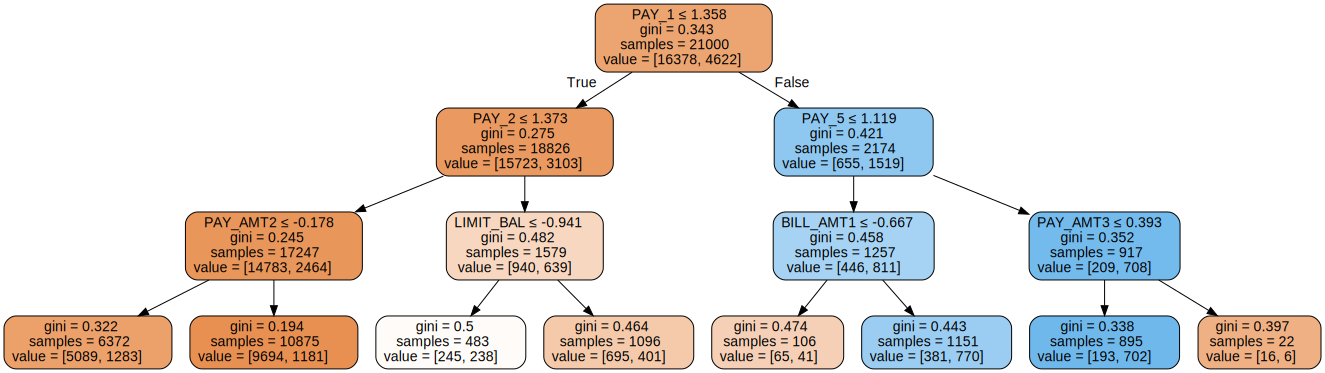

In [19]:
dot_data = tree.export_graphviz(tr, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [20]:
# Make predictions.
tr_pred=tr.predict(X_test)
print(tr_pred)

# CV score
tr_cv=cross_val_score(tr, X_train, y_train, cv=10).mean()
print ("Cross val: %.3f" % tr_cv)

[1 0 1 ... 0 0 0]
Cross val: 0.820


In [21]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % tr.score(X_test, y_test))

# Precision
print('Precision: %.3f' % precision_score(y_test, tr_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, tr_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, tr_pred))

Accuracy: 0.816
Precision: 0.698
Recall: 0.312
F1 score: 0.432


In [22]:
#### CONFUSION MATRIX FOR DECISION TREE

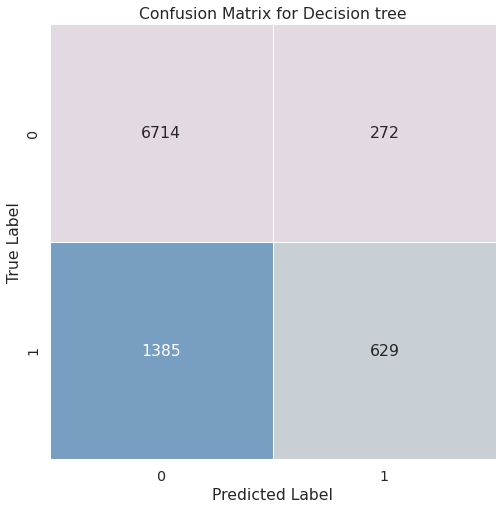

In [23]:
# Plot confusion matrix for Decision tree.
tr_matrix = confusion_matrix(y_test,tr_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');

In [24]:
# Predict propabilities for the test data.
tr_probs = tr.predict_proba(X_test)

# Keep Probabilities of the positive class only.
tr_probs = tr_probs[:, 1]

# Compute the AUC Score.
auc_tr = roc_auc_score(y_test, tr_probs)
print('AUC: %.2f' % auc_tr)

AUC: 0.74


### USING GRID SEARCH TO WORK ON HYPER - PARAMETERS

In [25]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
             }

# GridSearchCV estimator.
gs_tree = GridSearchCV(tr, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_tree.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=25),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             verbose=1)

In [26]:
# Make predictions with the best parameters.
gs_tree_pred=gs_tree.predict(X_test)

In [27]:
# Best parameters.
print("Best Decision tree Parameters: {}".format(gs_tree.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % gs_tree.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_tree.score(X_test,y_test)))

# Precision
print('Precision: %.3f' % precision_score(y_test, gs_tree_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, gs_tree_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, gs_tree_pred))

Best Decision tree Parameters: {'criterion': 'gini', 'max_depth': 1}
Cross-validation accuracy: 0.821
Accuracy: 0.816
Precision: 0.688
Recall: 0.327
F1 score: 0.443


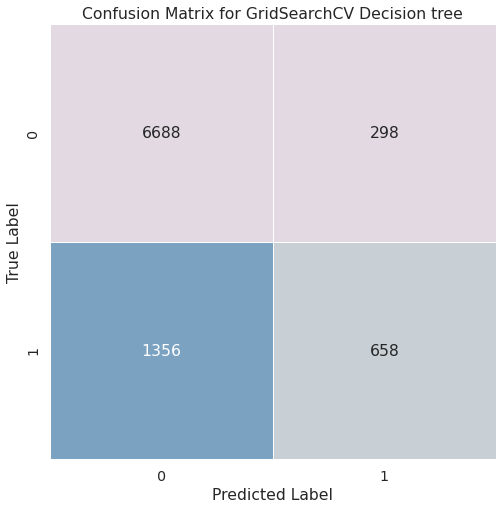

In [28]:
# Plot confusion matrix for Decision tree.
gs_tr_matrix = confusion_matrix(y_test,gs_tree_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Decision tree');

In [29]:
# Predict probabilities for the test data.
gs_tree_probs = gs_tree.predict_proba(X_test)

# Keep Probabilities of the positive class only.
gs_tree_probs = gs_tree_probs[:, 1]

# Compute the AUC Score.
gs_tree_auc = roc_auc_score(y_test, gs_tree_probs)
print('AUC: %.2f' % gs_tree_auc)

AUC: 0.64


## LETS SEE THEM ON ROC CURVE

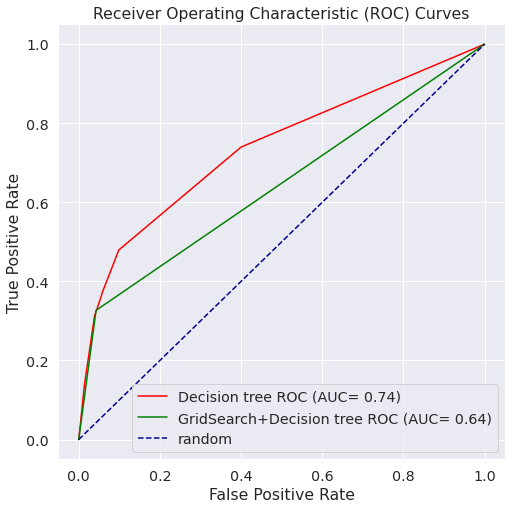

In [30]:
# Get the ROC Curves.
gs_tr_fpr, gs_tr_tpr, gs_tr_thresholds = roc_curve(y_test, gs_tree_probs)
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_test, tr_probs)

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(tr_fpr, tr_tpr, color='red', label='Decision tree ROC (AUC= %0.2f)'% auc_tr)
plt.plot(gs_tr_fpr, gs_tr_tpr, color='green', label='GridSearch+Decision tree ROC (AUC= %0.2f)'% gs_tree_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

### We can see that GRID SEARCH dint work well and we are ahving better result with only DECISION TREE . We have AUC as 0.74 with DECISON TREE whereas it dropped to 0.64 when we applied GRID SEARCH.

In [31]:
metrics=['Accuracy', 'CV accuracy', 'Precision','Recall','F1','ROC AUC']

fig = go.Figure(data=[
    go.Bar(name='Decision tree', x=metrics,
           y=[tr.score(X_test, y_test),tr_cv,precision_score(y_test, tr_pred),recall_score(y_test, tr_pred),f1_score(y_test, tr_pred),auc_tr]),
    
    go.Bar(name='GridSearchCV+Decision tree',
           x=metrics, y=[gs_tree.score(X_test,y_test),gs_tree.best_score_,precision_score(y_test, gs_tree_pred),recall_score(y_test, gs_tree_pred), f1_score(y_test, gs_tree_pred),gs_tree_auc]),
])

fig.update_layout(title_text='Metrics for each model',
                  barmode='group',xaxis_tickangle=-45,bargroupgap=0.05)
fig.show()

#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

In [32]:
from scipy.stats import randint

from sklearn.model_selection import RandomizedSearchCV

In [33]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}


In [34]:
random_search_cv = RandomizedSearchCV(tr, param_dist, cv=5)

In [35]:
random_search_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=25),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f08c0852a90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f08c08b3e50>})

In [36]:
# Make predictions with the best parameters.
random_search_cv_pred=random_search_cv.predict(X_test)

In [37]:
# Best parameters.
print("Best Decision tree Parameters: {}".format(random_search_cv.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % random_search_cv.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (random_search_cv.score(X_test,y_test)))

# Precision
print('Precision: %.3f' % precision_score(y_test, random_search_cv_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, random_search_cv_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, random_search_cv_pred))

Best Decision tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 3}
Cross-validation accuracy: 0.821
Accuracy: 0.817
Precision: 0.703
Recall: 0.313
F1 score: 0.434


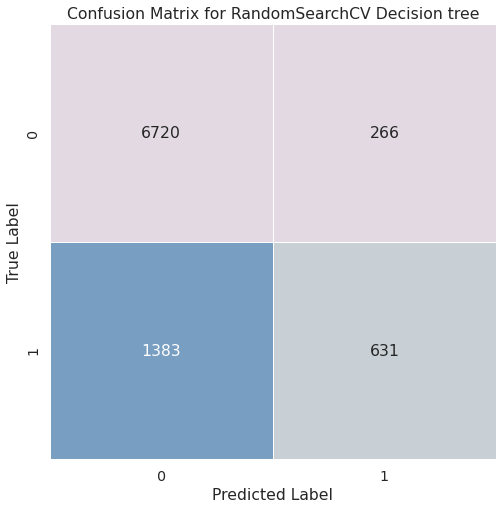

In [38]:
# Plot confusion matrix for Decision tree.
random_tr_matrix = confusion_matrix(y_test,random_search_cv_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(random_tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomSearchCV Decision tree');

In [39]:
# Predict probabilities for the test data.
random_search_cv_probs = random_search_cv.predict_proba(X_test)

# Keep Probabilities of the positive class only.
random_search_cv_probs = random_search_cv_probs[:, 1]

# Compute the AUC Score.
random_search_cv_auc = roc_auc_score(y_test, random_search_cv_probs)
print('AUC: %.2f' % random_search_cv_auc)

AUC: 0.73


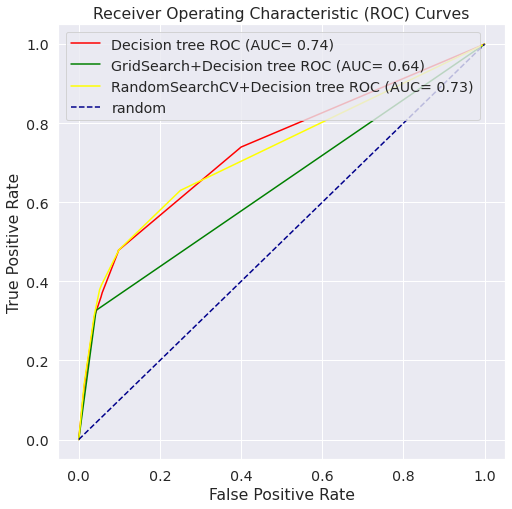

In [40]:
# Get the ROC Curves.
random_tr_fpr, random_tr_tpr, random_tr_thresholds = roc_curve(y_test, random_search_cv_probs)
gs_tr_fpr, gs_tr_tpr, gs_tr_thresholds = roc_curve(y_test, gs_tree_probs)
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_test, tr_probs)

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(tr_fpr, tr_tpr, color='red', label='Decision tree ROC (AUC= %0.2f)'% auc_tr)
plt.plot(gs_tr_fpr, gs_tr_tpr, color='green', label='GridSearch+Decision tree ROC (AUC= %0.2f)'% gs_tree_auc)
plt.plot(random_tr_fpr, random_tr_tpr, color='yellow', label='RandomSearchCV+Decision tree ROC (AUC= %0.2f)'% random_search_cv_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

In [41]:
metrics=['Accuracy', 'CV accuracy', 'Precision','Recall','F1','ROC AUC']

fig = go.Figure(data=[
    go.Bar(name='Decision tree', x=metrics,
           y=[tr.score(X_test, y_test),tr_cv,precision_score(y_test, tr_pred),recall_score(y_test, tr_pred),f1_score(y_test, tr_pred),auc_tr]),
    
    go.Bar(name='GridSearchCV+Decision tree',
           x=metrics, y=[gs_tree.score(X_test,y_test),gs_tree.best_score_,precision_score(y_test, gs_tree_pred),recall_score(y_test, gs_tree_pred), f1_score(y_test, gs_tree_pred),gs_tree_auc]),

    go.Bar(name='RandomSearchCV+Decision tree',
           x=metrics, y=[random_search_cv.score(X_test,y_test),random_search_cv.best_score_,precision_score(y_test, random_search_cv_pred),recall_score(y_test, random_search_cv_pred), f1_score(y_test, random_search_cv_pred),random_search_cv_auc]),
])

fig.update_layout(title_text='Metrics for each model',
                  barmode='group',xaxis_tickangle=-45,bargroupgap=0.05)
fig.show()

In [42]:
d={
'': ['Decision Tree','GridSearchCV + Decision Tree','RandomSearchCV + Decision Tree'],
'Accuracy': [tr.score(X_test, y_test),gs_tree.score(X_test,y_test),random_search_cv.score(X_test, y_test)],
'CV Accuracy': [tr_cv,gs_tree.best_score_,random_search_cv.best_score_],
'Precision': [precision_score(y_test, tr_pred),precision_score(y_test, gs_tree_pred),precision_score(y_test, random_search_cv_pred)],
'Recall': [recall_score(y_test, tr_pred),recall_score(y_test, gs_tree_pred),recall_score(y_test, random_search_cv_pred)],
'F1': [f1_score(y_test, tr_pred),f1_score(y_test, gs_tree_pred),f1_score(y_test, random_search_cv_pred)],
'ROC AUC': [auc_tr, gs_tree_auc, random_search_cv_auc]
}

results=pd.DataFrame(data=d).round(3).set_index('')
results

,Accuracy,CV Accuracy,Precision,Recall,F1,ROC AUC
,,,,,,
Decision Tree,0.816,0.820,0.698,0.312,0.432,0.736
GridSearchCV + Decision Tree,0.816,0.821,0.688,0.327,0.443,0.642
RandomSearchCV + Decision Tree,0.817,0.821,0.703,0.313,0.434,0.727


### As we see the comparison RANDOMIZED SEARCH gave us better result than GRID SEARCH but they are similar to normal DECISION TREE.

In [43]:
random_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=7,
                       min_samples_leaf=3, random_state=25)

In [44]:
print("Tuned Decision Tree Parameters: {}".format(random_search_cv.best_params_))
print("Best score is {}".format(random_search_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 3}
Best score is 0.8206190476190477


#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


In [45]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from time import time

### AdaBoost Classifier

In [46]:
ada_clf = AdaBoostClassifier(
    tr, n_estimators=50,
    algorithm="SAMME.R", learning_rate=0.5)
start = time()
ada_clf.fit(X_train, y_train)
end = time()
train_time_ada=end-start


In [47]:
# Predict probabilities for the test data.
ada_clf_probs = ada_clf.predict_proba(X_test)

# Keep Probabilities of the positive class only.
ada_clf_probs = ada_clf_probs[:, 1]

# Compute the AUC Score.
ada_clf_auc = roc_auc_score(y_test, ada_clf_probs)
print('AUC: %.2f' % ada_clf_auc)

AUC: 0.76


In [48]:
y_pred = ada_clf.predict(X_test)
#from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, ada_clf_probs)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Adaboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Adaboost,0.816778,0.671362,0.355015,0.464437,0.76405


### Extra Tree Classifier

In [49]:
forest = ExtraTreesClassifier(n_estimators=50)
start = time()
forest.fit(X_train, y_train)
end = time()
train_time_et=end-start


In [50]:
# Predict probabilities for the test data.
forest_probs = forest.predict_proba(X_test)

# Keep Probabilities of the positive class only.
forest_probs = forest_probs[:, 1]

# Compute the AUC Score.
forest_auc = roc_auc_score(y_test, forest_probs)
print('AUC: %.2f' % forest_auc)

AUC: 0.74


In [51]:
y_pred = forest.predict(X_test)
#from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, forest_probs)
acc = accuracy_score(y_test, y_pred)
prec= precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Extra Tree ', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Adaboost,0.816778,0.671362,0.355015,0.464437,0.764050
1,Extra Tree,0.807667,0.625778,0.349553,0.448550,0.742567


### Random Forest Classifier

In [52]:
rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
start = time()
rnd_clf.fit(X_train, y_train)
end=time()
train_time_r50=end-start

In [53]:
# Predict probabilities for the test data.
rnd_clf_probs = rnd_clf.predict_proba(X_test)

# Keep Probabilities of the positive class only.
rnd_clf_probs = rnd_clf_probs[:, 1]

# Compute the AUC Score.
rnd_clf_auc = roc_auc_score(y_test, rnd_clf_probs)
print('AUC: %.2f' % rnd_clf_auc)

AUC: 0.78


In [54]:
y_pred_r = rnd_clf.predict(X_test)
#from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, rnd_clf_probs)
acc = accuracy_score(y_test, y_pred_r)
prec = precision_score(y_test, y_pred_r)
rec = recall_score(y_test, y_pred_r)
f1 = f1_score(y_test, y_pred_r)

model_results = pd.DataFrame([['Random_forest ', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Adaboost,0.816778,0.671362,0.355015,0.464437,0.764050
1,Extra Tree,0.807667,0.625778,0.349553,0.448550,0.742567
2,Random_forest,0.820333,0.689952,0.357994,0.471396,0.777510


### Gradient Boosting Classifier

In [55]:
gbes = GradientBoostingClassifier(n_estimators=50)
start = time()

end=time()
train_time_g=end-start
gbes.fit(X_train, y_train)
end=time()
train_time_g=end-start


In [56]:
y_pred = gbes.predict(X_test)

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Gboost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Adaboost,0.816778,0.671362,0.355015,0.464437,0.764050
1,Extra Tree,0.807667,0.625778,0.349553,0.448550,0.742567
2,Random_forest,0.820333,0.689952,0.357994,0.471396,0.777510
3,Gboost,0.820222,0.691489,0.355015,0.469160,0.654676


In [57]:
# Predict probabilities for the test data.
gbes_probs = gbes.predict(X_test)

# Keep Probabilities of the positive class only.
#gbes_probs = gbes_probs[:, 1]

# Compute the AUC Score.
gbes_auc = roc_auc_score(y_test, gbes_probs)
print('AUC: %.2f' % gbes_auc)

AUC: 0.65


### As we can see after using all the four ensemblers , we were able to get better results than our DECISION TREE MODEL. Out of the four Ensemblers RANDOM FOREST did best with AUC as 0.78.
### But if we look at the other factors like ACCURACY, PRECISION, RECALL, F1 SCORE then GRADIENT BOOSTING is better than all of them.

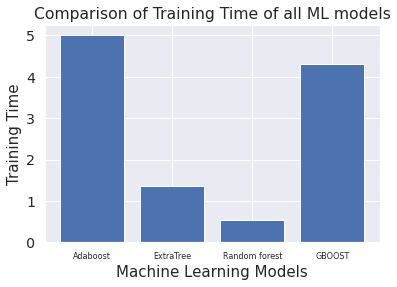

In [58]:
model = ['Adaboost','ExtraTree','Random forest', 'GBOOST']
Train_Time = [
    train_time_ada,
    train_time_et,
    train_time_r50,
    train_time_g

]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=8, )
plt.title('Comparison of Training Time of all ML models')
plt.show()

### If we compare looking at the time they toom then RANDOM FOREST is the fastest.

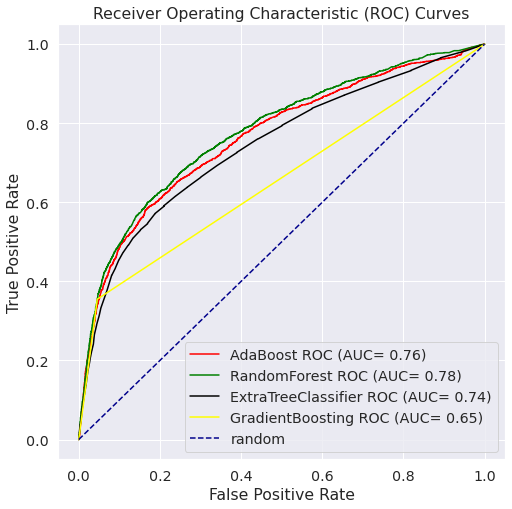

In [59]:
# Get the ROC Curves.
rnd_clf_fpr, rnd_clf_tpr, rnd_clf_thresholds = roc_curve(y_test, rnd_clf_probs)
ada_clf_fpr, ada_clf_tpr, ada_clf_thresholds = roc_curve(y_test, ada_clf_probs)
forest_fpr, forest_tpr, forest_thresholds = roc_curve(y_test, forest_probs)
gbes_fpr, gbes_tpr, gbes_thresholds = roc_curve(y_test, gbes_probs)

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(ada_clf_fpr, ada_clf_tpr, color='red', label='AdaBoost ROC (AUC= %0.2f)'% ada_clf_auc)
plt.plot(rnd_clf_fpr, rnd_clf_tpr, color='green', label='RandomForest ROC (AUC= %0.2f)'% rnd_clf_auc)
plt.plot(forest_fpr, forest_tpr, color='black', label='ExtraTreeClassifier ROC (AUC= %0.2f)'% forest_auc)
plt.plot(gbes_fpr, gbes_tpr, color='yellow', label='GradientBoosting ROC (AUC= %0.2f)'% gbes_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

### If we look at the ROC curve we can see that Random Forest is performing best out of the four ensemblers.

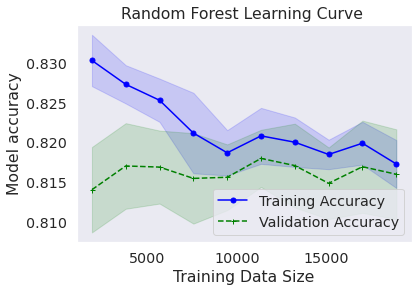

In [60]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=rnd_clf, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Random Forest Learning Curve ')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()


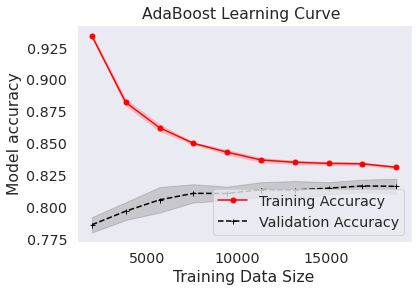

In [61]:
train_sizes, train_scores, test_scores = learning_curve(estimator=ada_clf, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')
plt.plot(train_sizes, test_mean, color='black', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='black')
plt.title('AdaBoost Learning Curve ')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

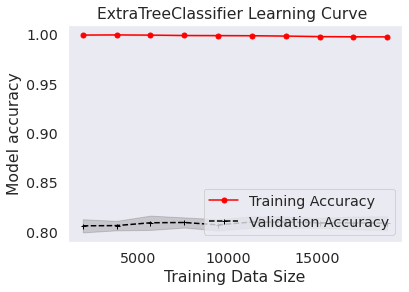

In [62]:
train_sizes, train_scores, test_scores = learning_curve(estimator=forest, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')
plt.plot(train_sizes, test_mean, color='black', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='black')
plt.title('ExtraTreeClassifier Learning Curve ')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

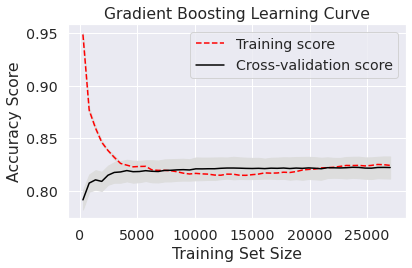

In [63]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(gbes, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="black", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Gradient Boosting Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Often, we are not aware of optimal values for hyperparameters which would generate the best model output. So, what we tell the model is to explore and select the optimal model architecture automatically. 
### Each model has its own sets of parameters that need to be tuned to get optimal output. For every model, our goal is to minimize the error or say to have predictions as close as possible to actual values.



### RANDOMIZED SEARCH
The model randomly makes combinations of its own and tries to fit the dataset and test the accuracy. Here, chances are there to miss on a few combinations which could have been optimal ones. Although, random search consumes quite less amount of time and most of the time it gives optimal solutions as well.

### GRID SEARCH
In this method, each combination of hyperparameter value is tried. This makes the process time consuming, or in short, inefficient. This method is quite an expensive method in terms of computation power and time, but this is the most efficient method as there is the least possibility of missing out on an optimal solution for a model.

### As we saw above our model performance got low when we used GRID SEARCH but improved when we used RANDOMIZED SEARCH CV. SO changing hyperparameters did make a little difference to our model performance.

### There are a number of machine learning models to choose from. When we build these models, we always use a set of historical data to help our machine learning algorithms learn what is the relationship between a set of input features to a predicted output. Below are few reasons why the model dint work or performed better:


## High Bias or High Variance

### High Bias refers to a scenario where your model is “underfitting” your dataset . This is bad because your model is not presenting a very accurate or representative picture of the relationship between your inputs and predicted output, and is often outputting high error .

### In cases of High Variance or “overfitting”, your machine learning model is so accurate that it is perfectly fitted to your example dataset. While this may seem like a good outcome, it is also a cause for concern, as such models often fail to generalize to future datasets. So while your model works well for your existing data, you don’t know how well it’ll perform on other examples.

### If you can generate a model with overall low error in both your train (past) and test (future) datasets, you’ll have found a model that is “Just Right” and balanced the right levels of bias and variance.


## Low Precision or Low Recall

### Even when you have high accuracy, it’s possible that your machine learning model may be susceptible to other types of error.

### Precision is a measure of how often your predictions for the positive class are actually true. It’s calculated as the number of True Positives over the sum of the True Positives and False Positives.

### Recall is the measure of how often the actual positive class is predicted as such. It’s calculated as the number of True Positives over the sum of the True Positives and False Negatives.

### Another way to interpret the difference between Precision and Recall, is that Precision is measuring what fraction of your predictions for the positive class are valid, while Recall is telling you how often your predictions actually capture the positive class. Hence, a situation of Low Precision emerges when very few of your positive predictions are true, and Low Recall occurs if most of your positive values are never predicted.

### The goal of a good machine learning model is to get the right balance of Precision and Recall, by trying to maximize the number of True Positives while minimizing the number of False Negatives and False Positives 

### The above probelm can be solved by doing following changes:

####    Incase of High Bias - increasing the number of input features.
####    Incase of High Variance - reduce the number of input features. Increasing the number of training examples.
####    Incase of Low Precision - increase the probability threshold
####    Incase of Low Recall - reduce the probability threshold, therein predicting the positive class more often.

### Now we know that our data was imbalanced and need resampling with feature engineering thats why models were not able to perform as expected.